In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sets the matplotlib style to seaborn style

from scipy.io import loadmat 
from scipy.ndimage import convolve1d
from scipy.signal import butter
from scipy.signal import sosfiltfilt
from scipy.signal import welch

import h5py
import matplotlib
import pandas as pd

In [2]:
subj_1 = loadmat("subj1_relevant_vars.mat")
subj_2 = loadmat("subj2_relevant_vars.mat")
subj_3 = loadmat("subj3_relevant_vars.mat")

In [3]:
print(subj_1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'adjusted_class_new', 'adjusted_repetition_new', 'emg_flexors_new'])


In [4]:
# Sampling frequency (Hz)
fs_1 = subj_1["Fs"] 
fs_2 = subj_2["Fs"] 
fs_3 = subj_3["Fs"] 


In [5]:
fs_1 = np.array(fs_1)[0][0]
fs_2  = np.array(fs_2)[0][0]
fs_3 = np.array(fs_3)[0][0]

## Preprocessing
### Start with the first Subject :

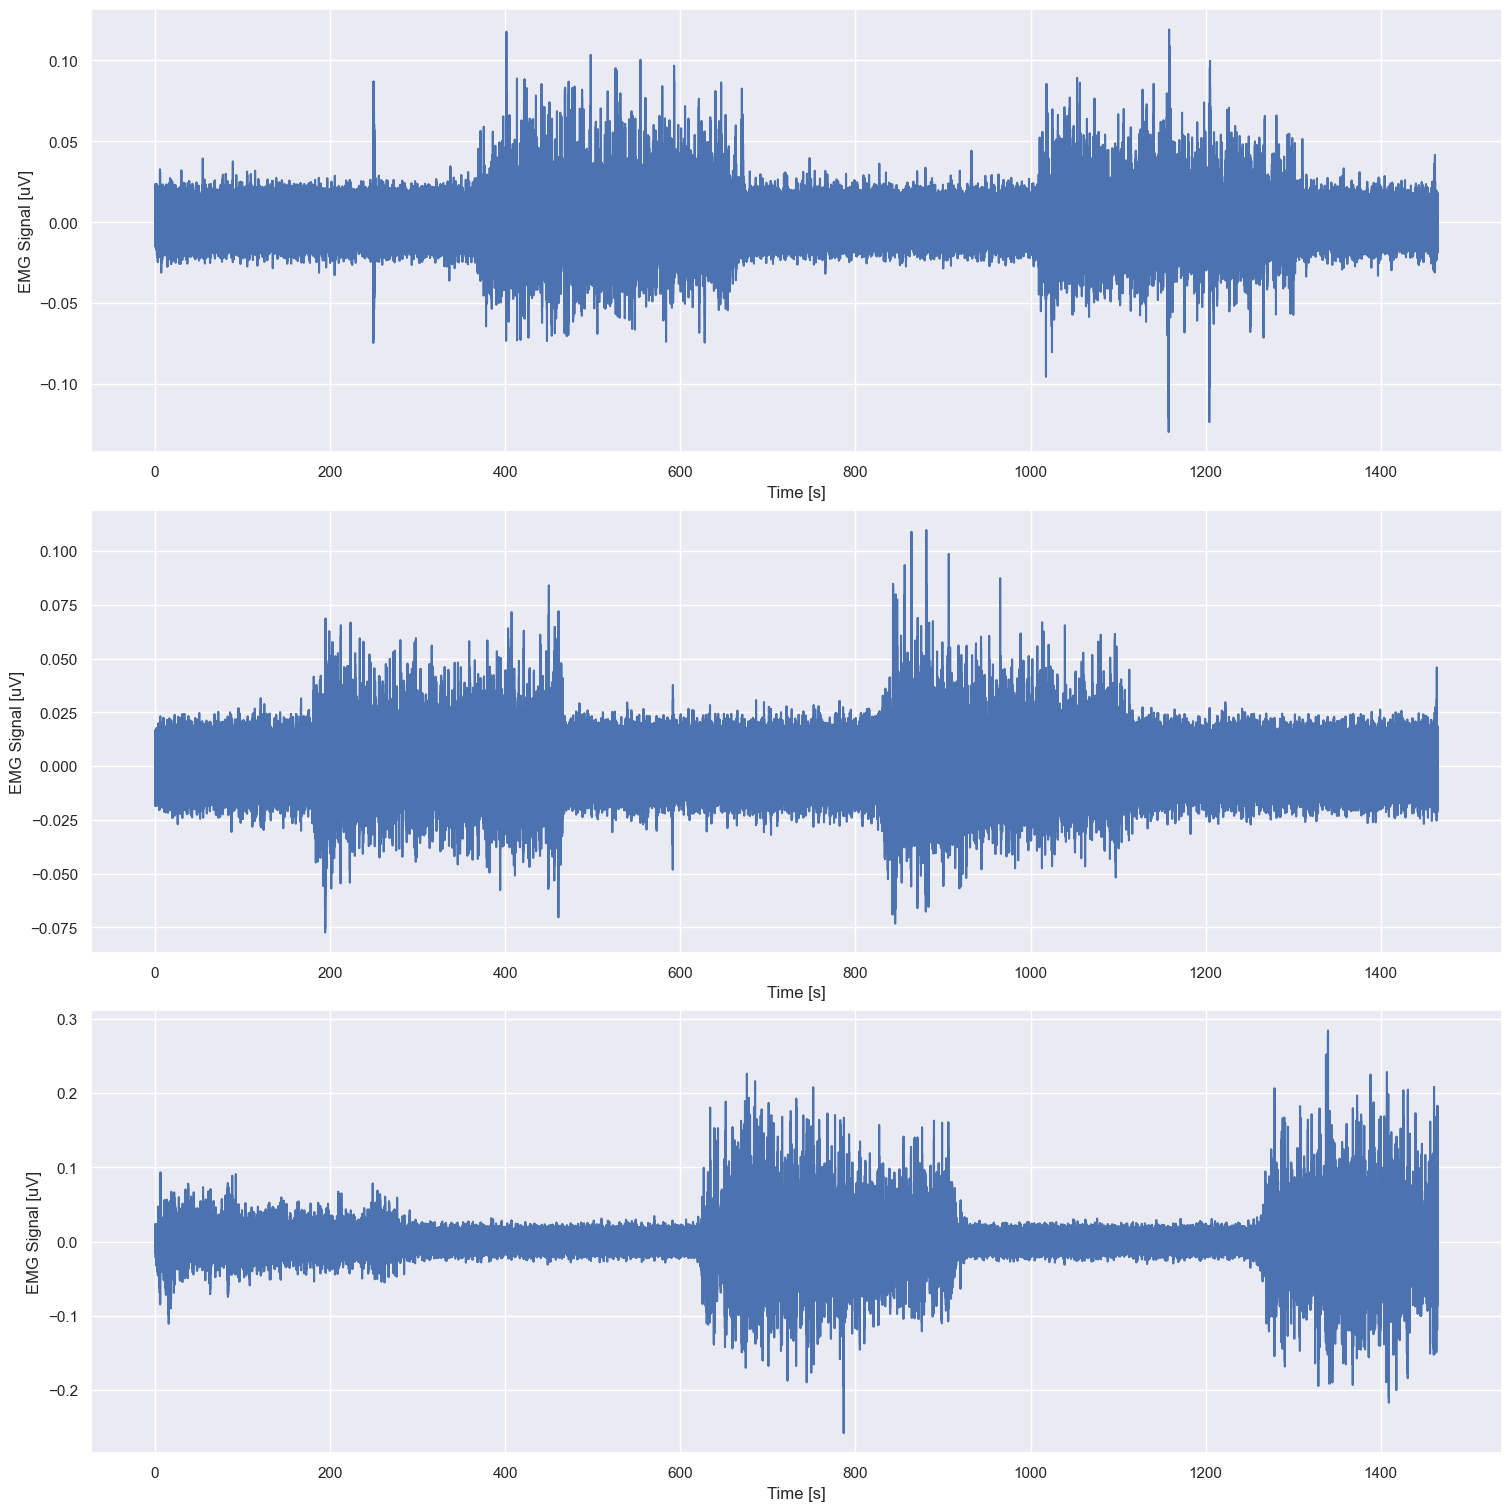

In [6]:
emg_1 = subj_1["emg_flexors_new"][:,:,:3000000] 
emg_1 = np.array(emg_1)
emg_1 = np.reshape(emg_1, (64, 3000000))
emg_1 = emg_1.T

n_channels = 3
tsteps = np.arange(0,emg_1.shape[0]/fs_1, 1/fs_1) # Time vector for plotting

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_1[:,i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]") 


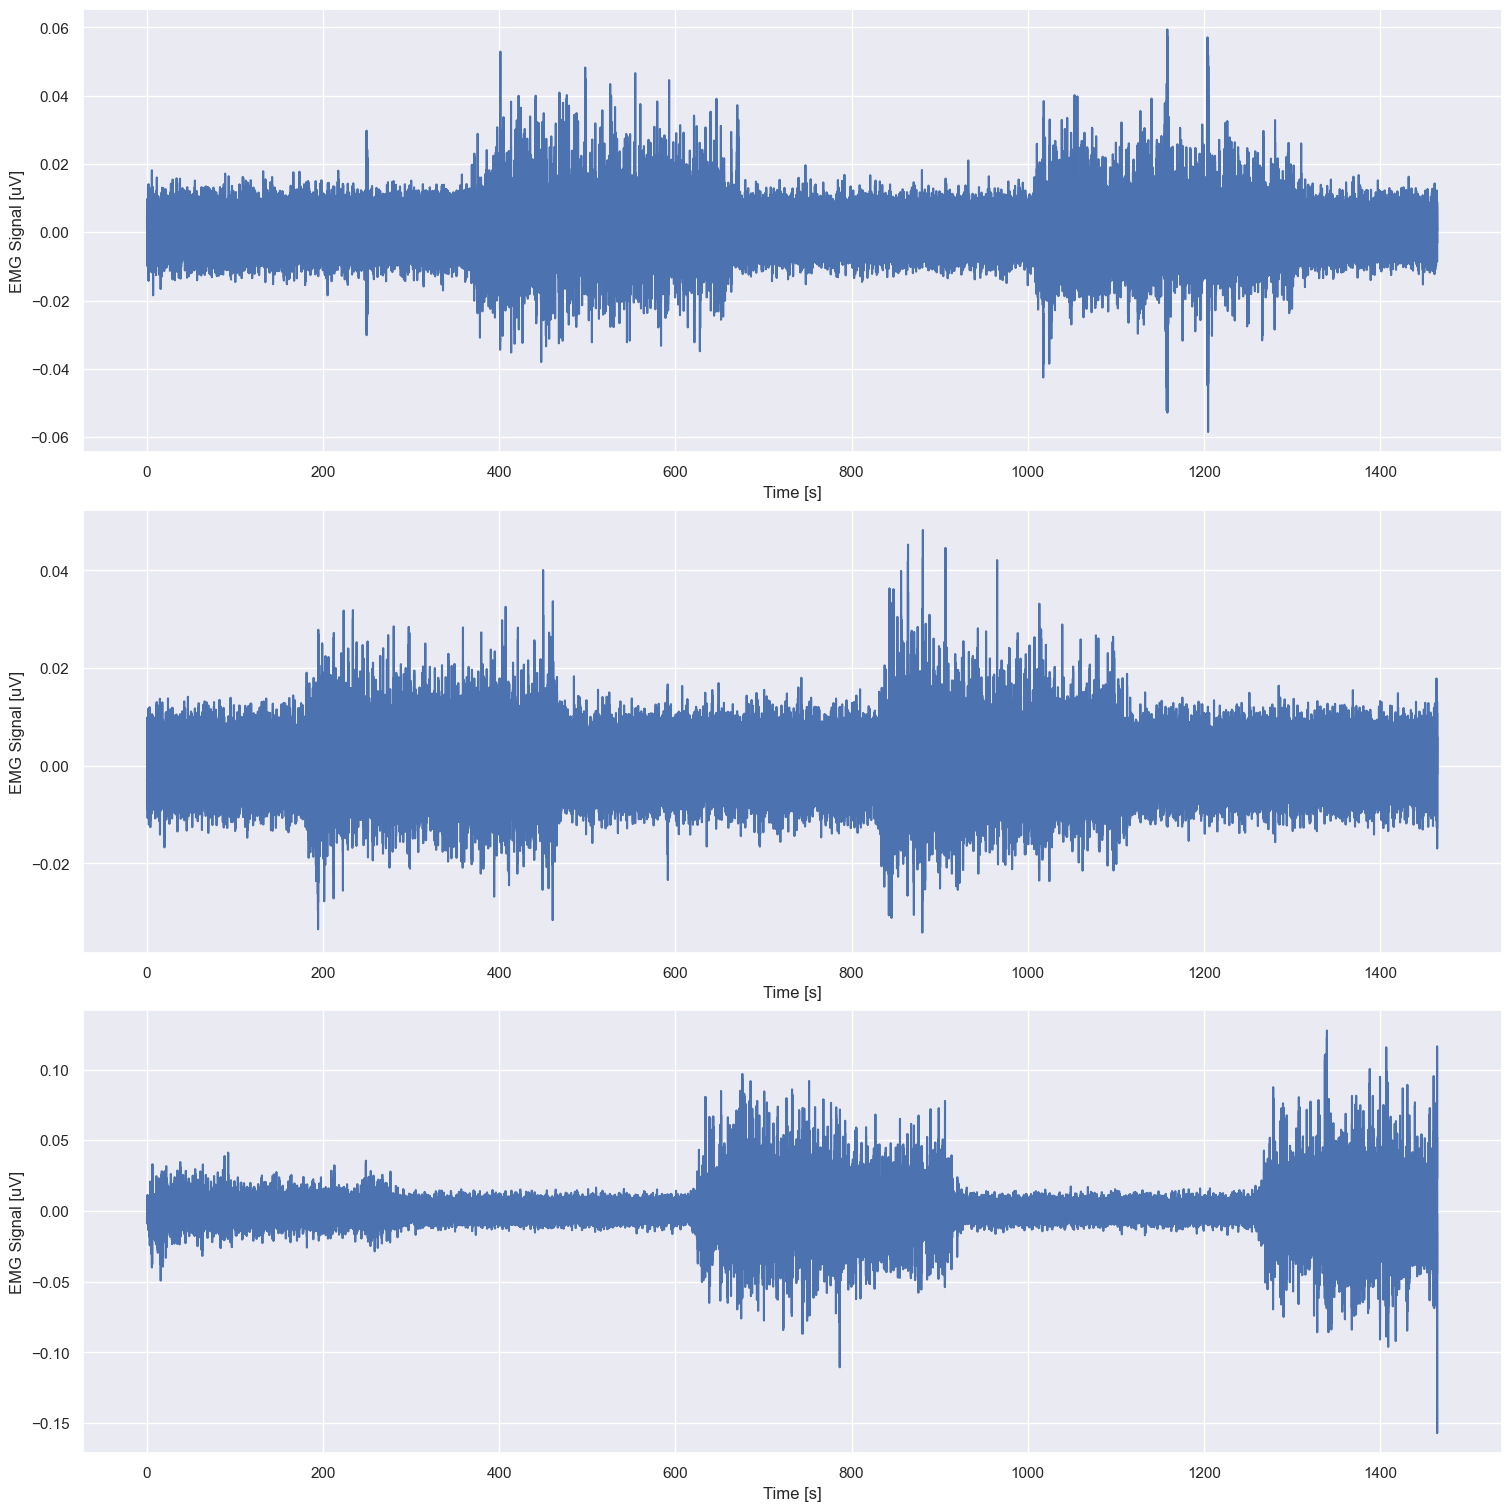

In [7]:
Wn = (5, 500) 
sos_1 = butter(N=4, Wn=Wn, fs=fs_1, btype="bandpass", output="sos") 
emg_filtered_1 = sosfiltfilt(sos_1, emg_1.T).T 

Wns = [n*50 for n in range(1,11)] # removing 50Hz noise and its harmonics

for Wn in Wns:
    sos_1 = butter(N=4, Wn=(Wn - 0.5, Wn + 0.5), fs=fs_1, btype="bandstop", output="sos")
    emg_filtered_1 = sosfiltfilt(sos_1, emg_filtered_1.T).T

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_filtered_1[:,i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")

Text(0.5, 1.0, 'Log scale for y-axis')

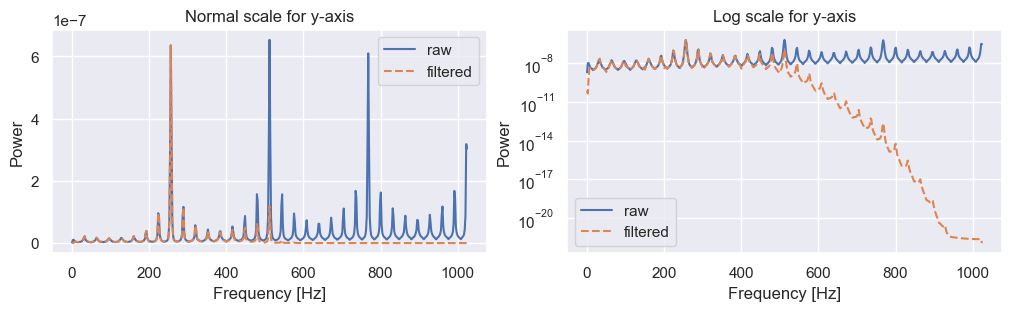

In [8]:
#Use Welch's method for power spectral density estimation, it reduces the variance of the estimate.
freqs_pre_1, Pxx_pre_1 = welch(emg_1[:, 0], fs=fs_1, nperseg=1064)
freqs_post_1, Pxx_post_1 = welch(emg_filtered_1[:, 0],fs = fs_1,  nperseg=1064)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3))
ax[0].plot(freqs_pre_1, Pxx_pre_1, label="raw")
ax[0].plot(freqs_post_1, Pxx_post_1, linestyle="--", label="filtered")
ax[0].legend()
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_ylabel("Power")
ax[0].set_title("Normal scale for y-axis")

ax[1].semilogy(freqs_pre_1, Pxx_pre_1, label="raw")
ax[1].semilogy(freqs_post_1, Pxx_post_1, linestyle="--", label="filtered")
ax[1].legend()
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Power")
ax[1].set_title("Log scale for y-axis")

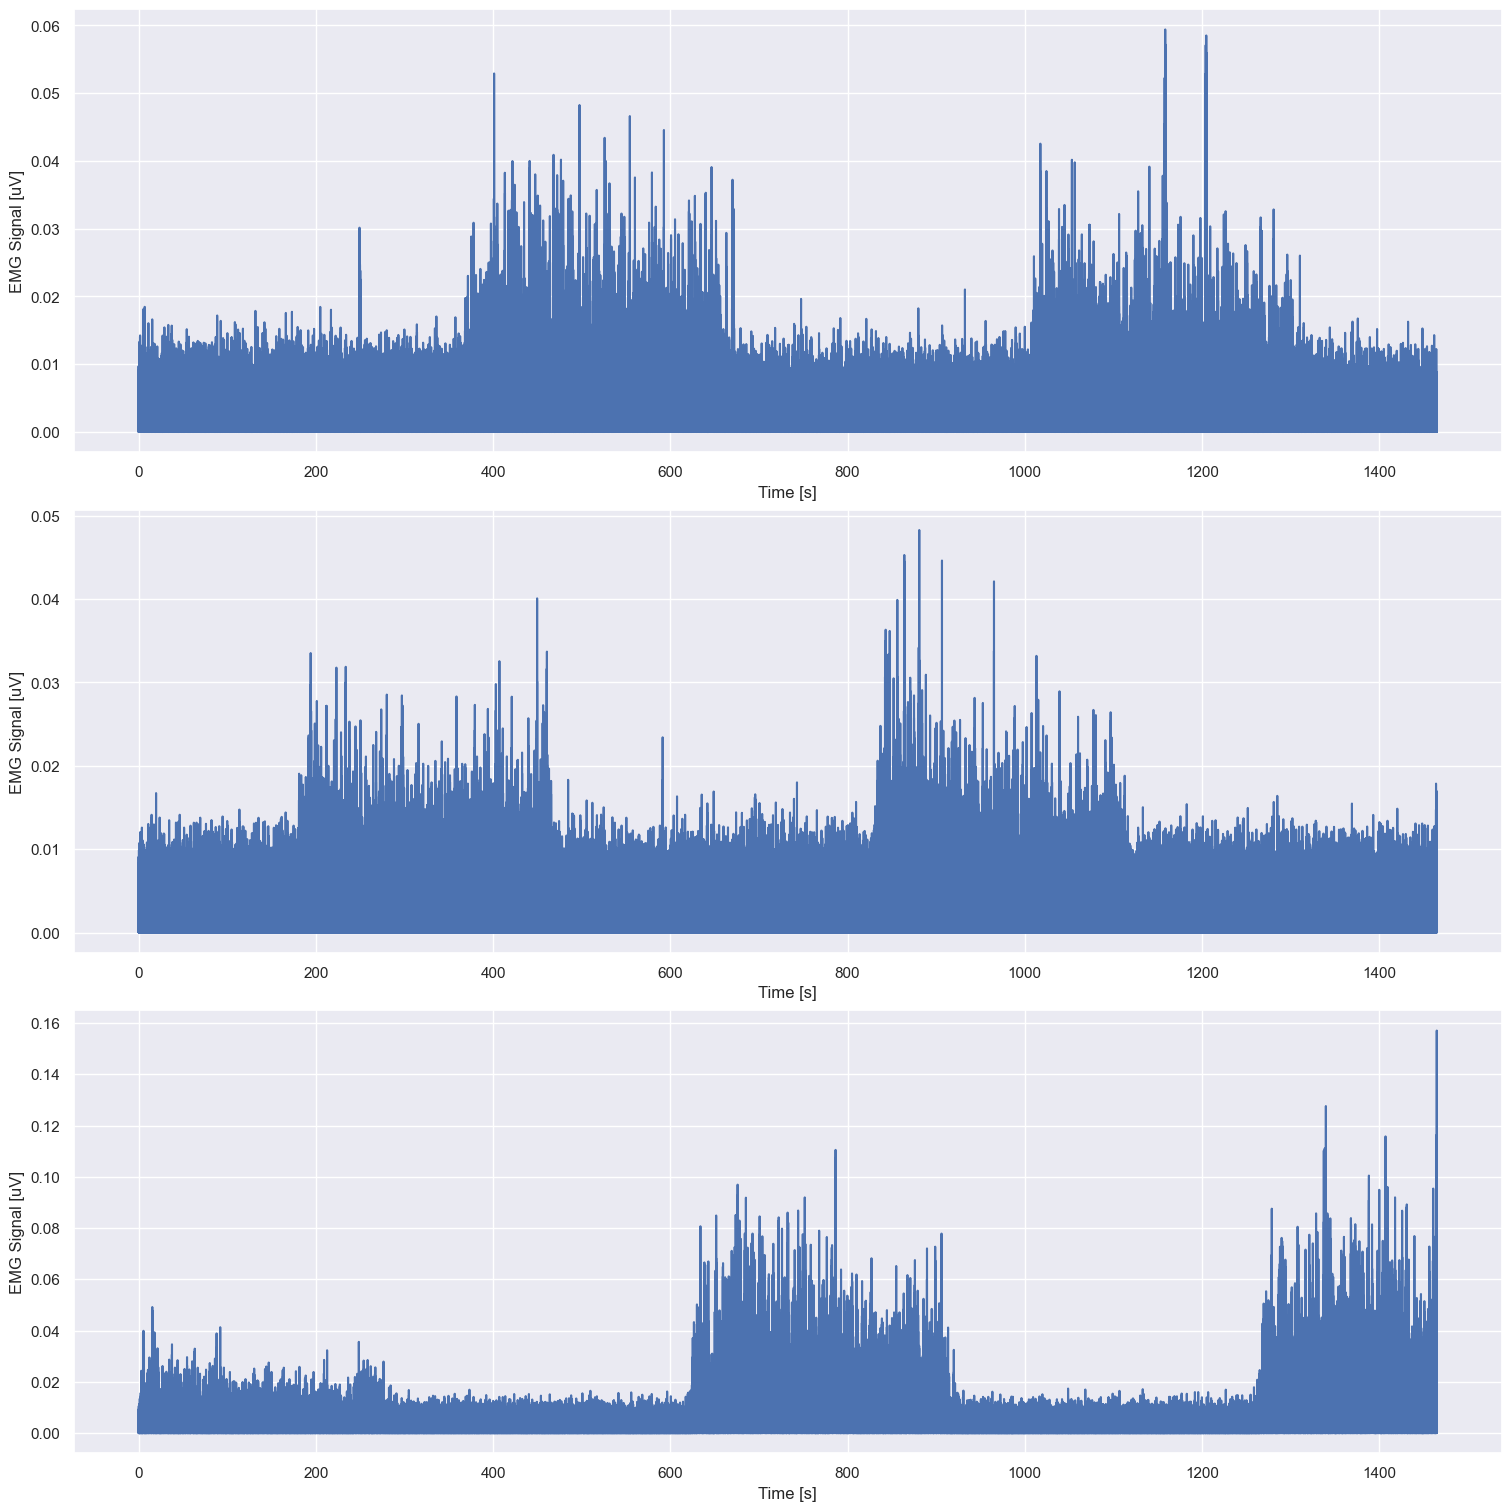

In [9]:
emg_rectified_1 = np.abs(emg_filtered_1) # Rectify the signal

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_rectified_1[:, i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")

Text(0.5, 0.98, 'EMG envelopes')

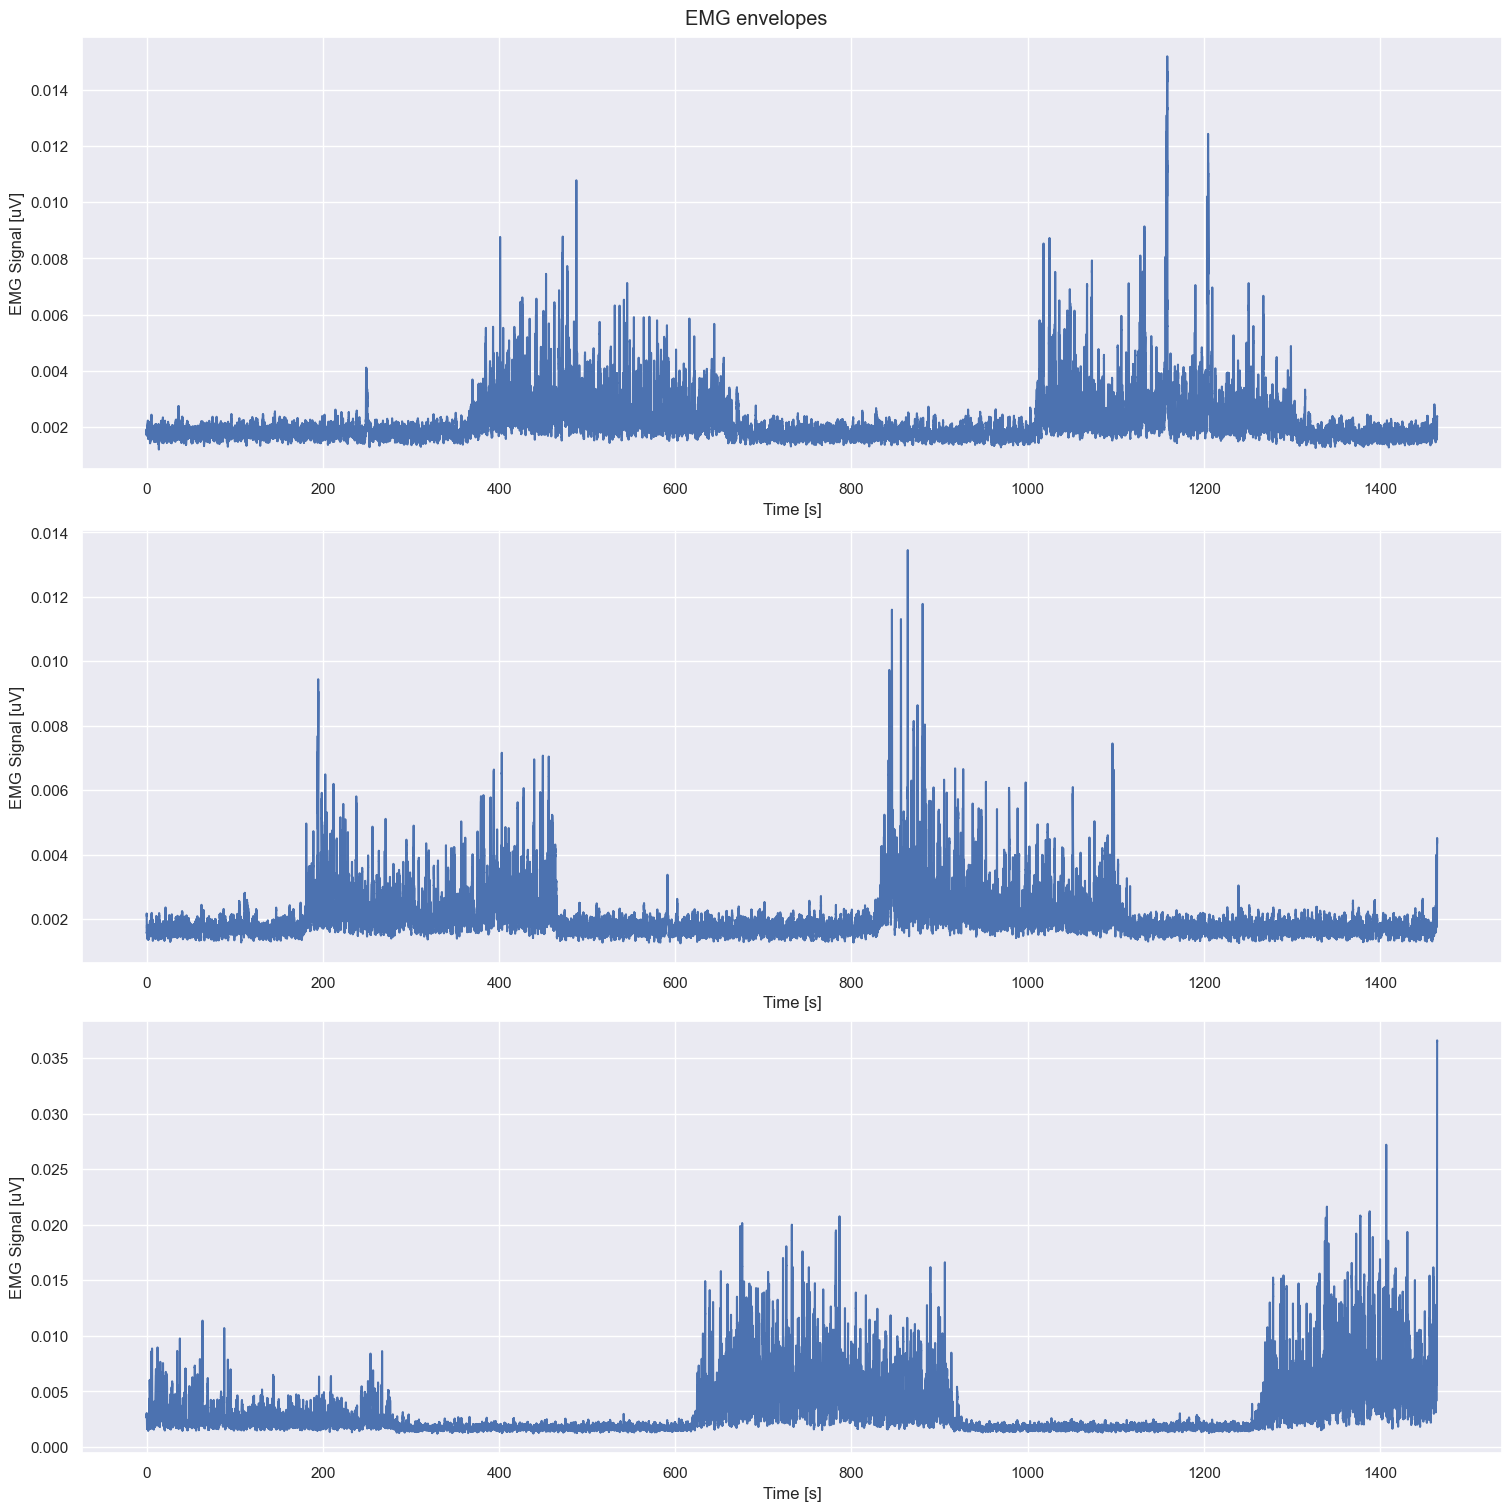

In [10]:
mov_mean_size = 400
mov_mean_weights = np.ones(mov_mean_size) / mov_mean_size
emg_envelopes_1 = convolve1d(emg_rectified_1, weights = mov_mean_weights, axis=0) # convolve1d the rectified signal with the moving average weights


fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_envelopes_1[:, i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")
plt.suptitle("EMG envelopes")

In [11]:
compression = 2
emg_envelopes_1 = emg_envelopes_1[::2, :]
emg_envelopes_1.shape

(1500000, 64)

## Preprocessing
### Subject number 2

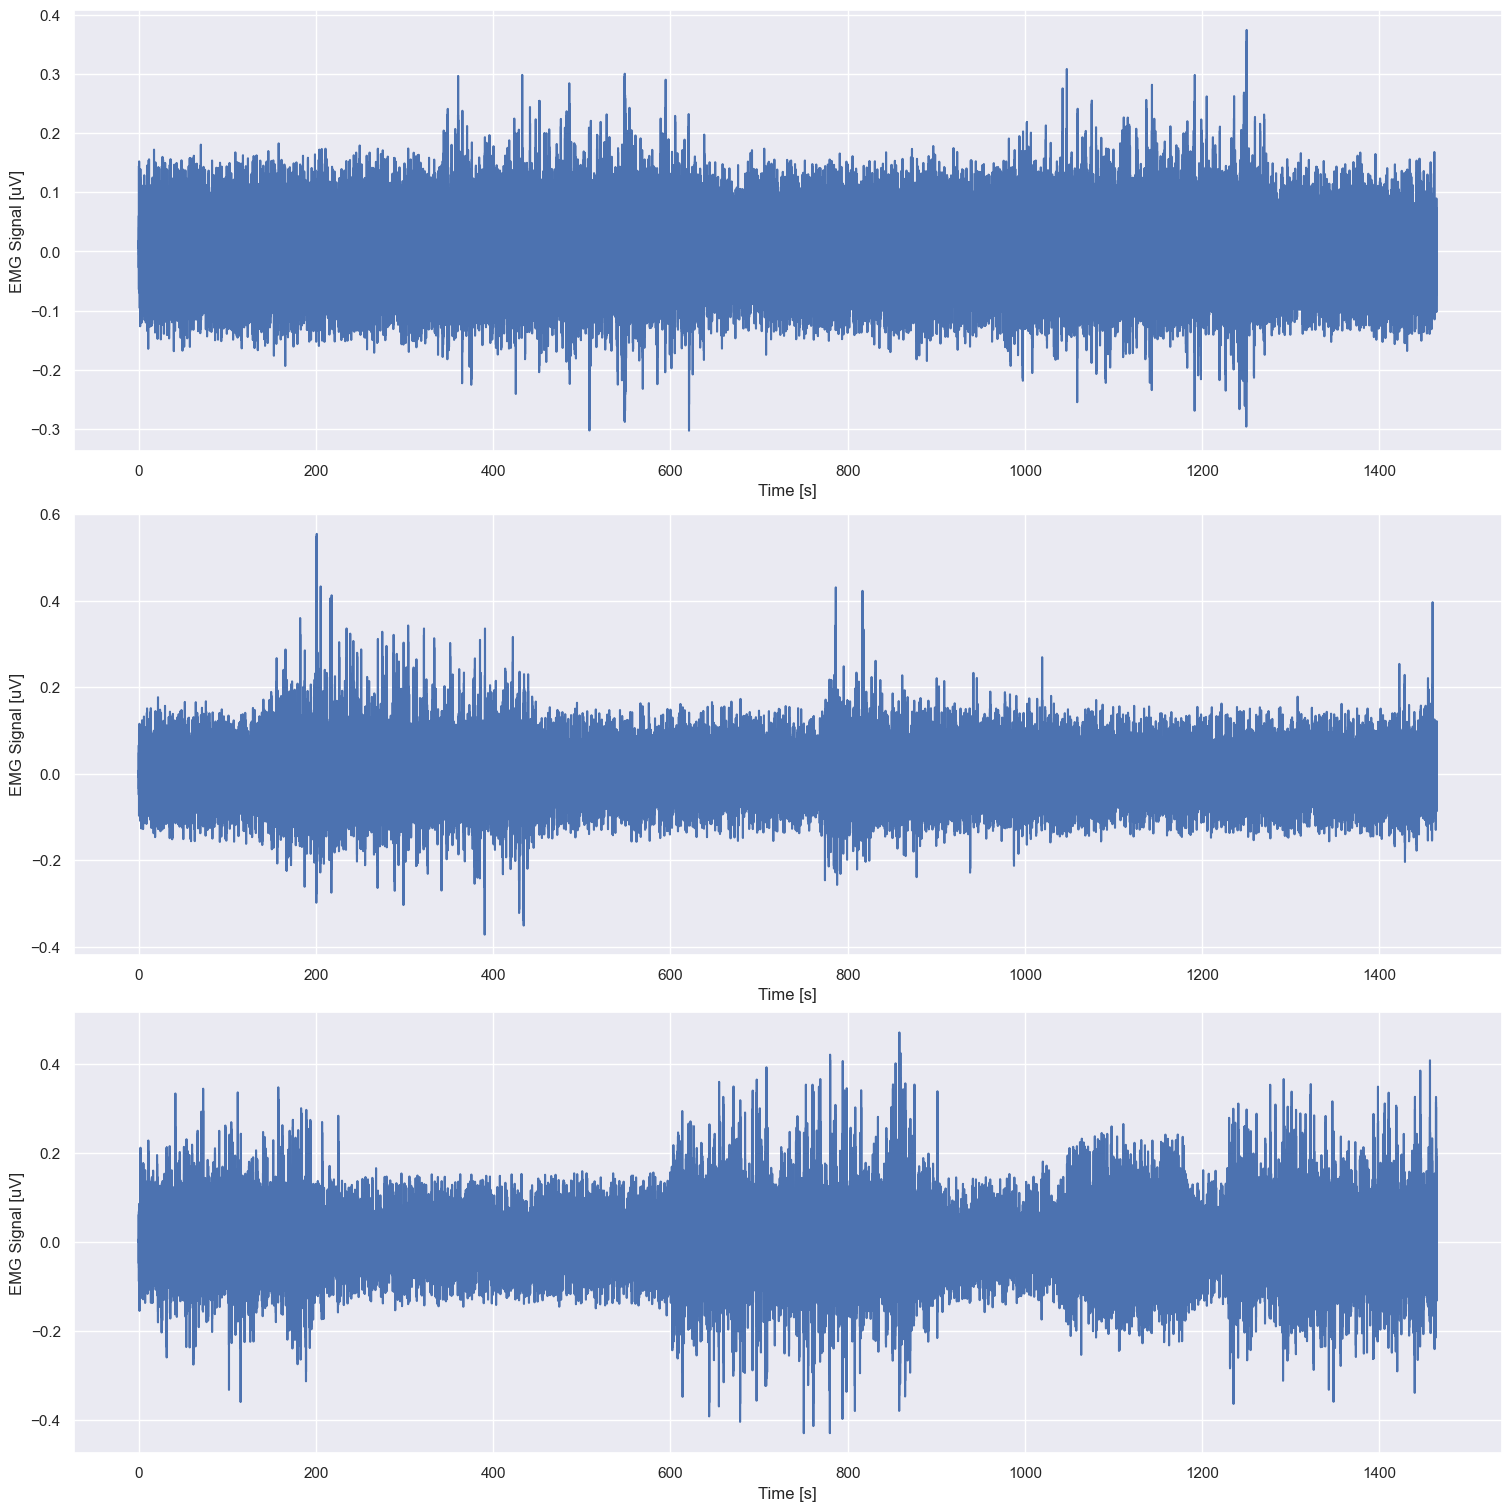

In [12]:
emg_2 = subj_2["emg_flexors_new"][:,:,:3000000] 
emg_2 = np.array(emg_2)
emg_2 = np.reshape(emg_2, (64, 3000000))
emg_2 = emg_2.T

n_channels = 3
tsteps = np.arange(0,emg_2.shape[0]/fs_2, 1/fs_2) # Time vector for plotting

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_2[:,i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]") 


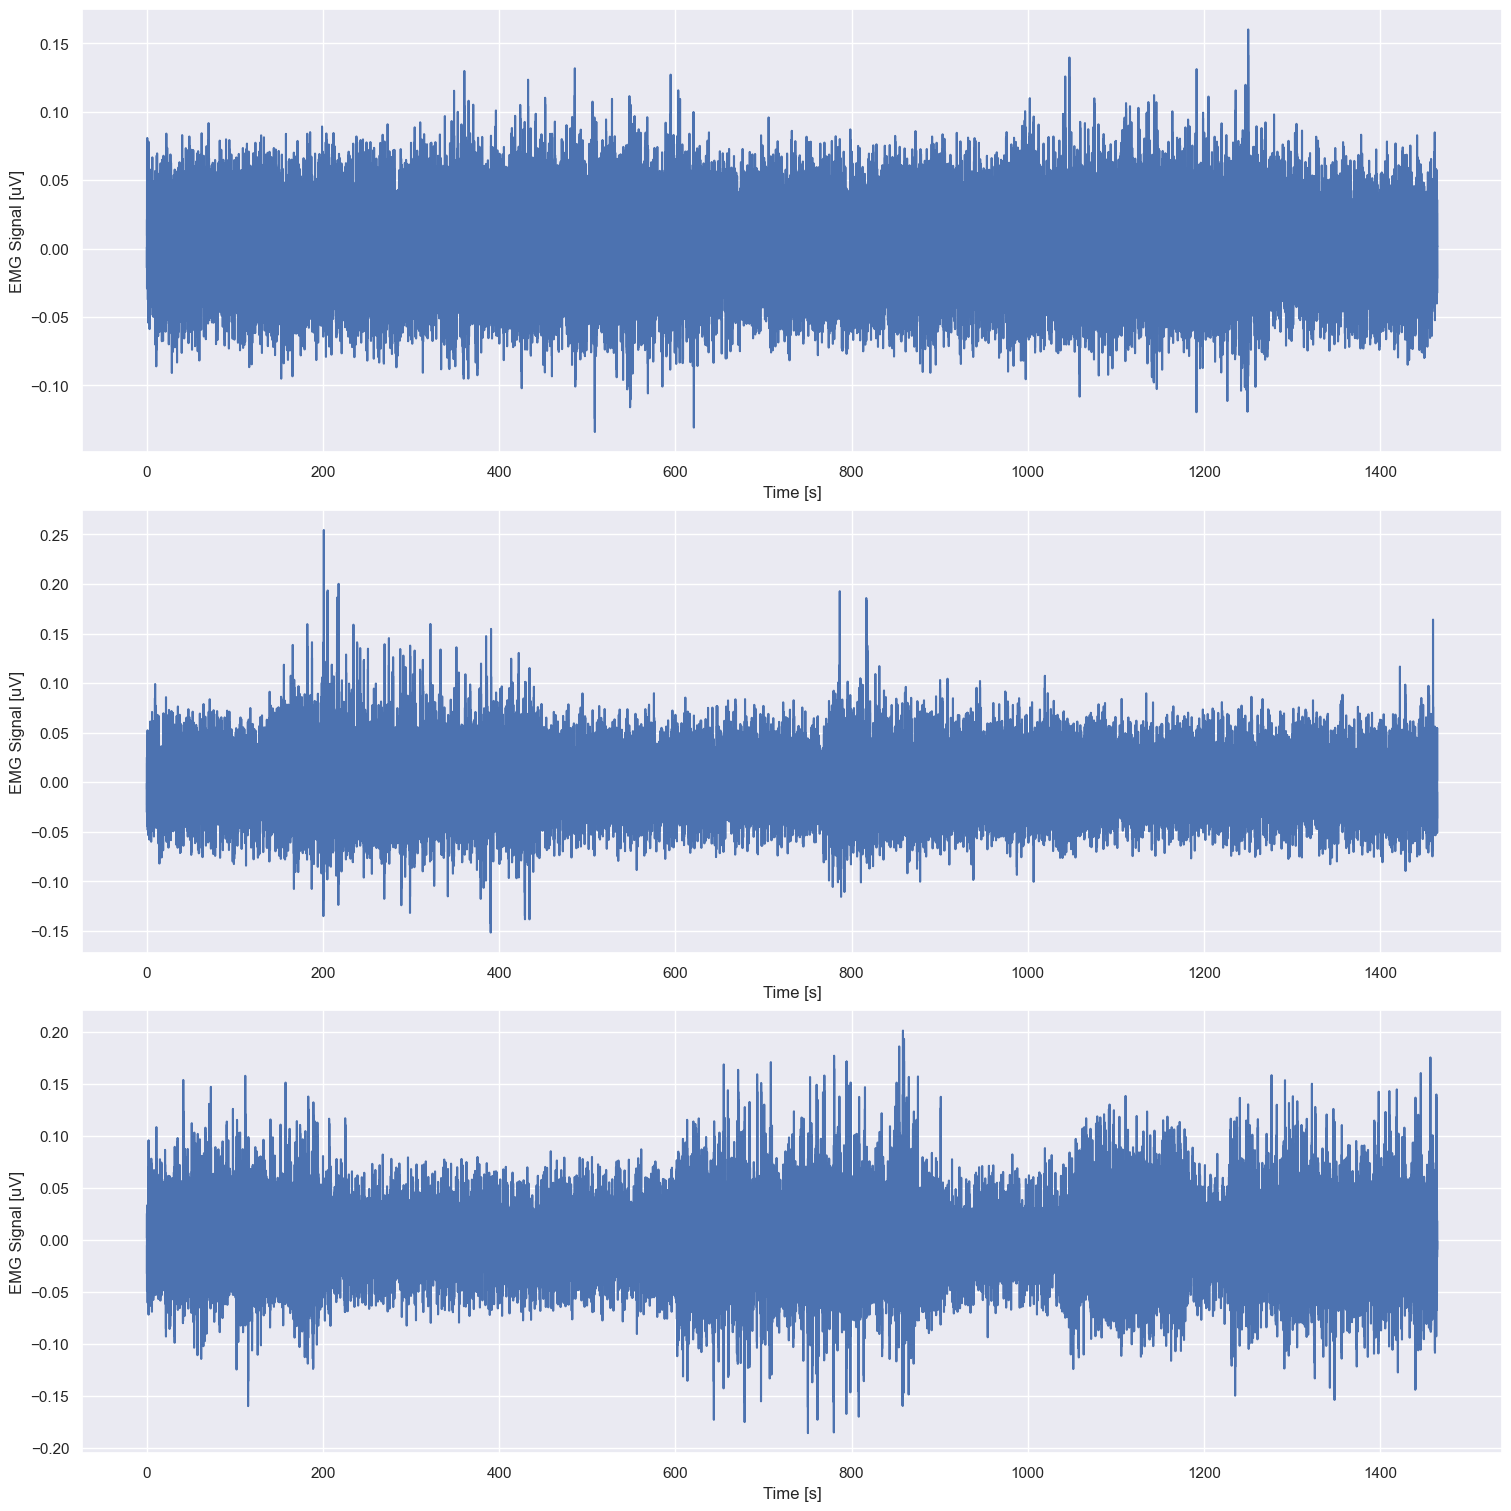

In [13]:
Wn = (5, 500) 
sos_2 = butter(N=4, Wn=Wn, fs=fs_2, btype="bandpass", output="sos") 
emg_filtered_2 = sosfiltfilt(sos_2, emg_2.T).T 

Wns = [n*50 for n in range(1,11)] # removing 50Hz noise and its harmonics

for Wn in Wns:
    sos_2 = butter(N=4, Wn=(Wn - 0.5, Wn + 0.5), fs=fs_2, btype="bandstop", output="sos")
    emg_filtered_2 = sosfiltfilt(sos_2, emg_filtered_2.T).T

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_filtered_2[:,i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")

Text(0.5, 1.0, 'Log scale for y-axis')

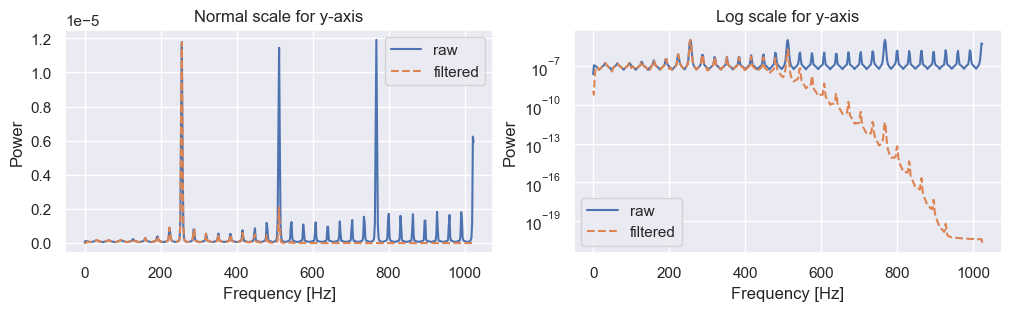

In [14]:
#Use Welch's method for power spectral density estimation, it reduces the variance of the estimate.
freqs_pre_2, Pxx_pre_2 = welch(emg_2[:, 0], fs=fs_2, nperseg=1064)
freqs_post_2, Pxx_post_2 = welch(emg_filtered_2[:, 0],fs = fs_2,  nperseg=1064)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3))
ax[0].plot(freqs_pre_2, Pxx_pre_2, label="raw")
ax[0].plot(freqs_post_2, Pxx_post_2, linestyle="--", label="filtered")
ax[0].legend()
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_ylabel("Power")
ax[0].set_title("Normal scale for y-axis")

ax[1].semilogy(freqs_pre_2, Pxx_pre_2, label="raw")
ax[1].semilogy(freqs_post_2, Pxx_post_2, linestyle="--", label="filtered")
ax[1].legend()
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Power")
ax[1].set_title("Log scale for y-axis")

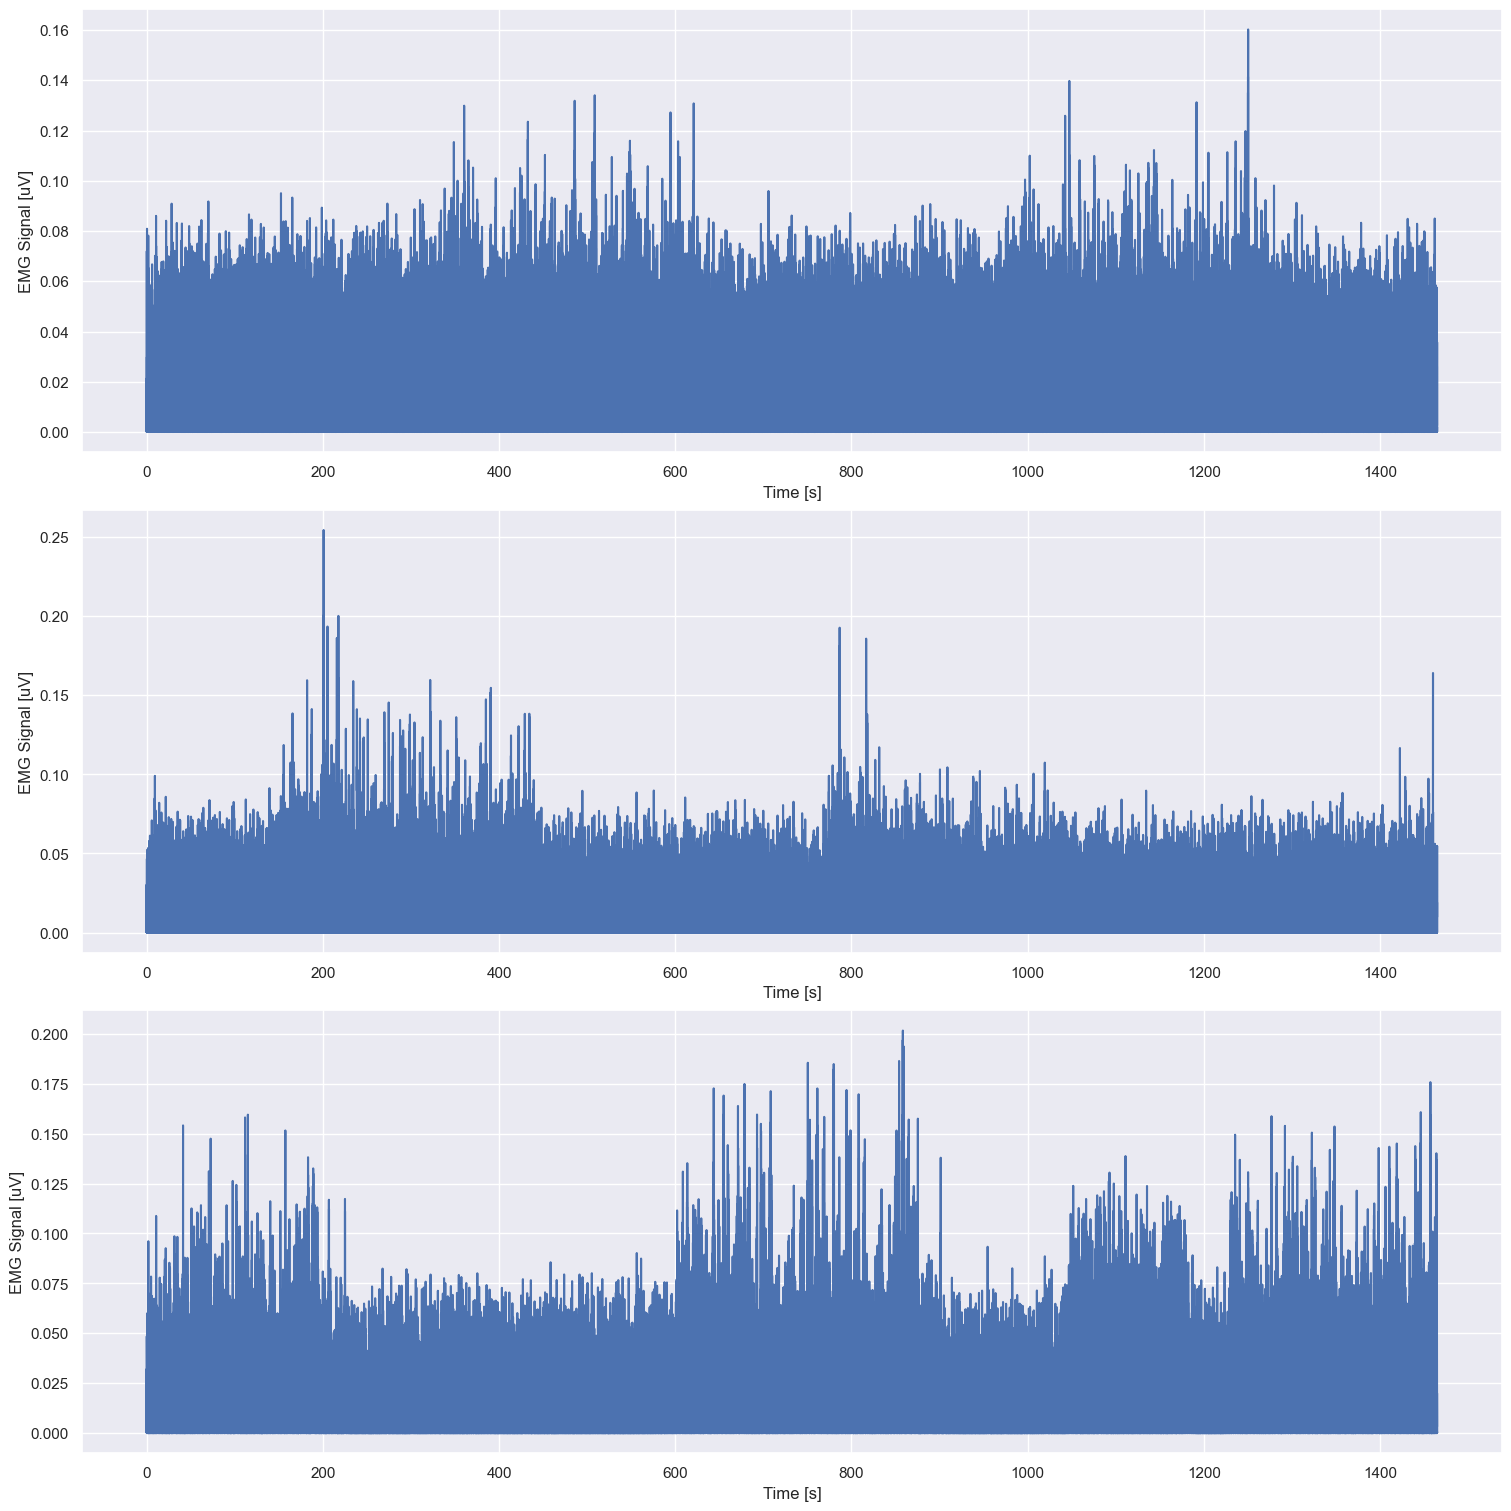

In [15]:
emg_rectified_2 = np.abs(emg_filtered_2) # Rectify the signal

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_rectified_2[:, i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")

Text(0.5, 0.98, 'EMG envelopes')

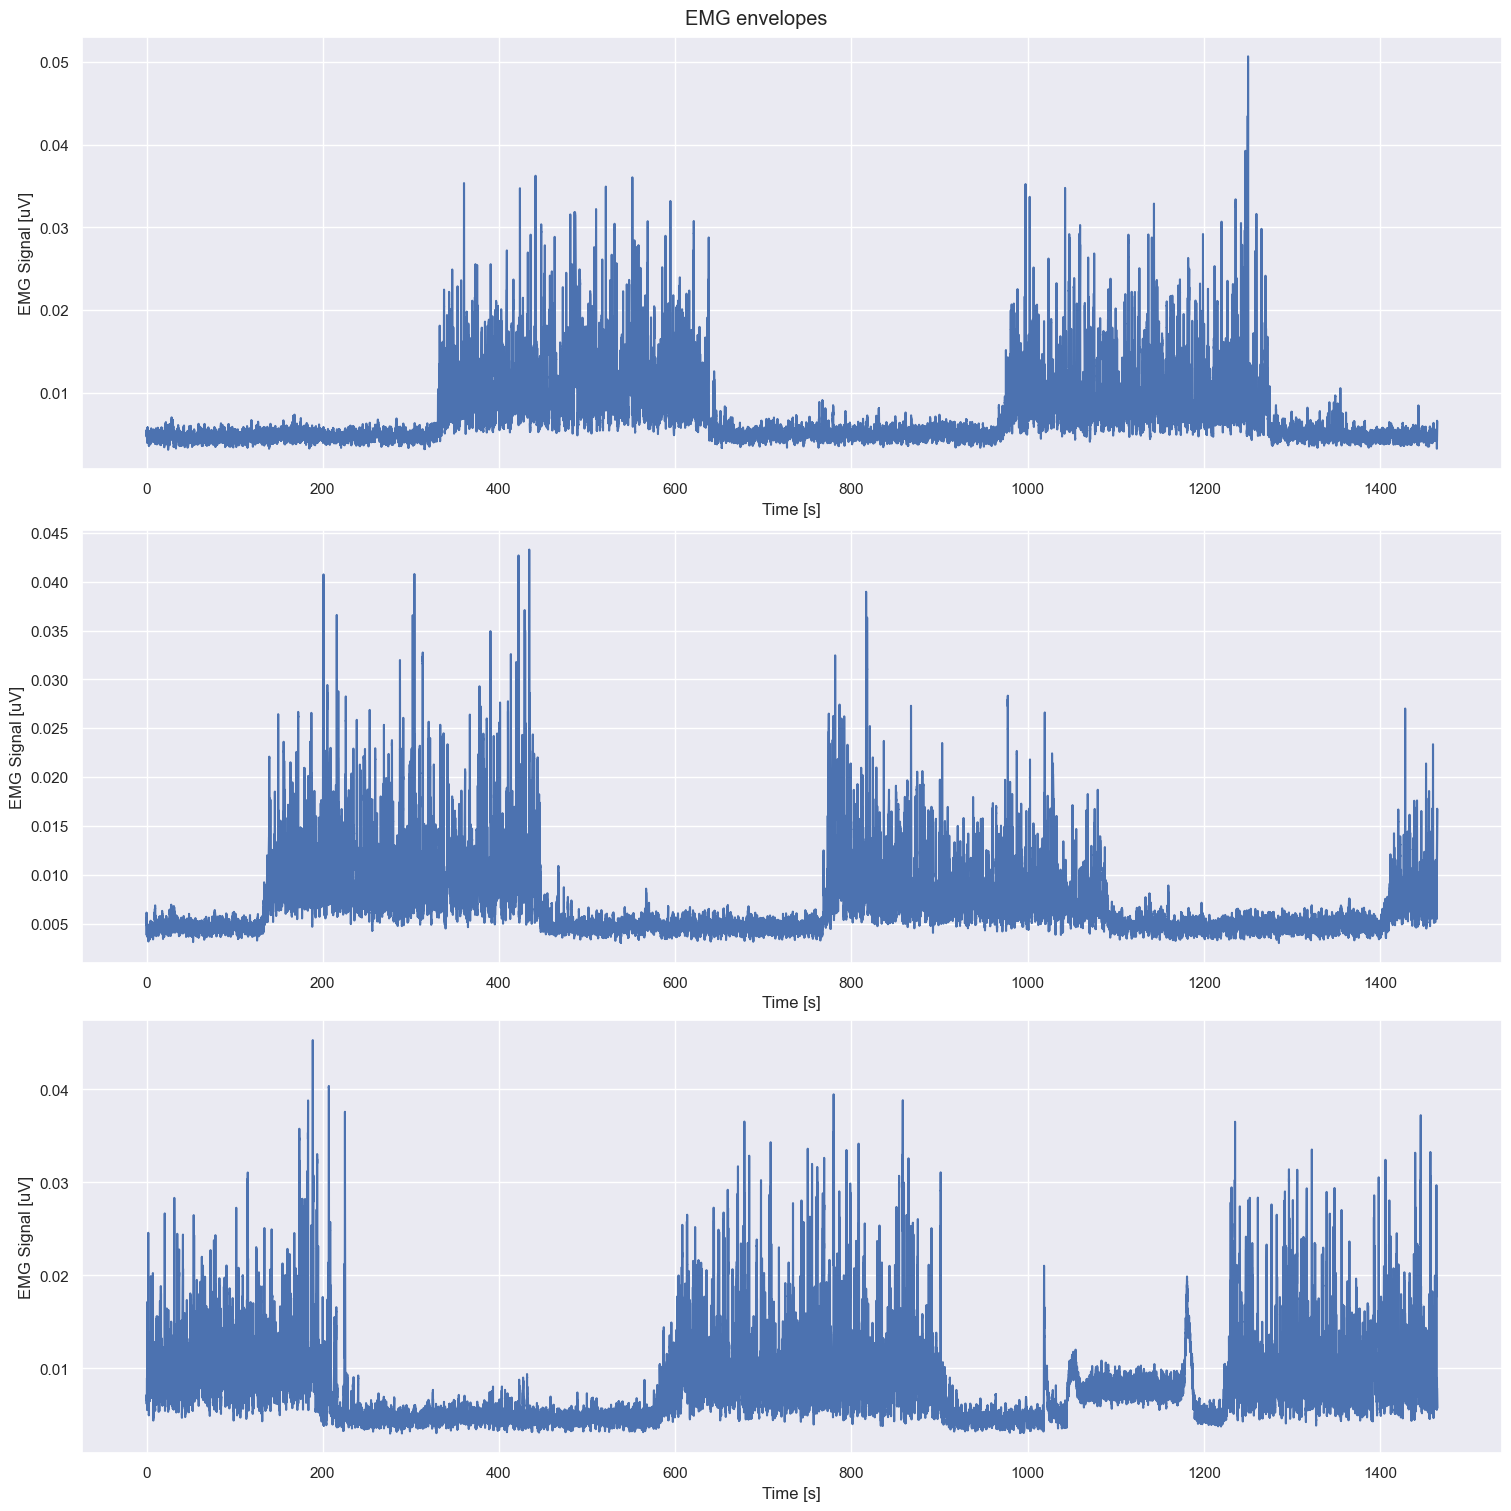

In [16]:
mov_mean_size = 400
mov_mean_weights = np.ones(mov_mean_size) / mov_mean_size
emg_envelopes_2 = convolve1d(emg_rectified_2, weights = mov_mean_weights, axis=0) # convolve1d the rectified signal with the moving average weights


fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_envelopes_2[:, i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")
plt.suptitle("EMG envelopes")

In [17]:
compression = 2
emg_envelopes_2 = emg_envelopes_2[::2, :]
emg_envelopes_2.shape

(1500000, 64)

## Preprocessing
### Subject Number 3

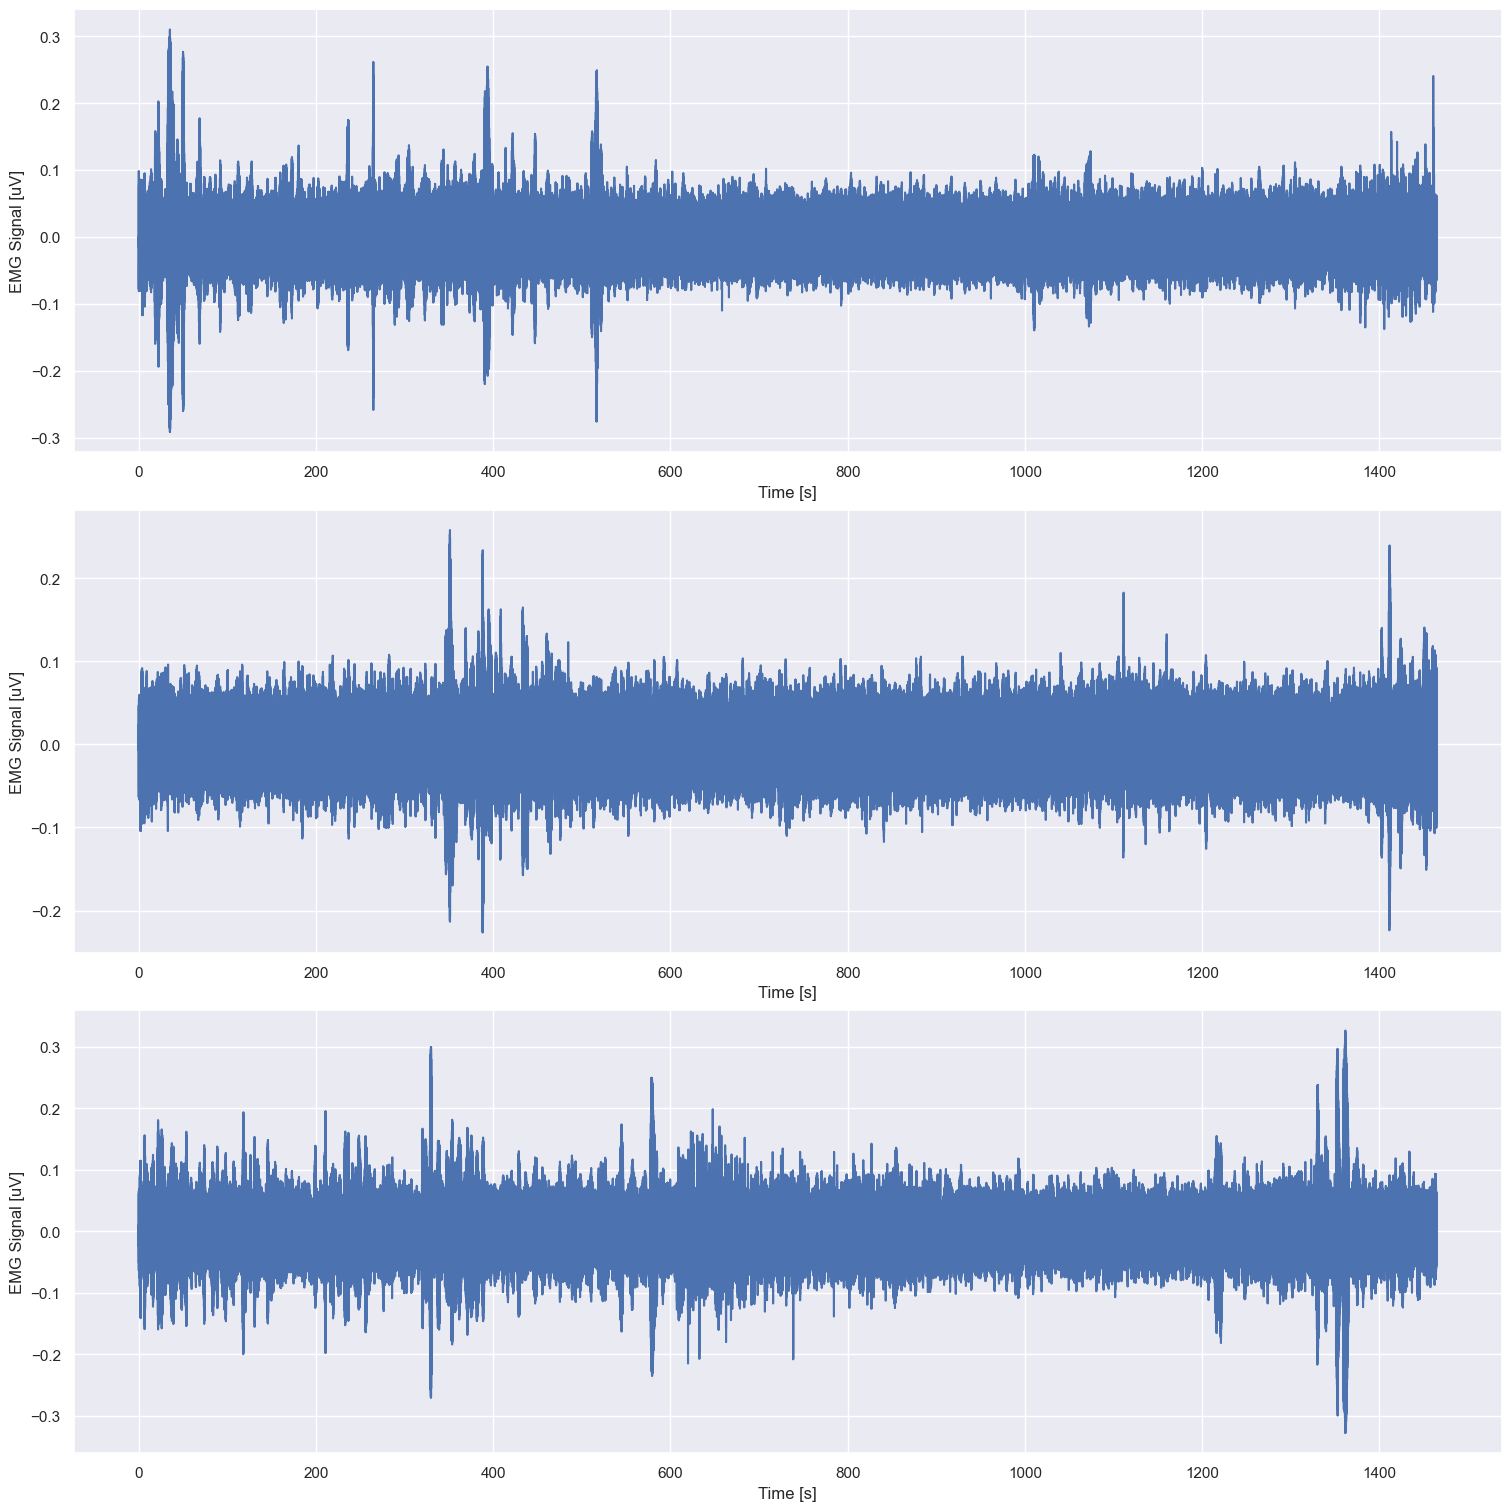

In [18]:
emg_3 = subj_3["emg_flexors_new"][:,:,:3000000] 
emg_3 = np.array(emg_3)
emg_3 = np.reshape(emg_3, (64, 3000000))
emg_3 = emg_3.T

n_channels = 3
tsteps = np.arange(0,emg_3.shape[0]/fs_3, 1/fs_3) # Time vector for plotting

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_3[:,i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]") 


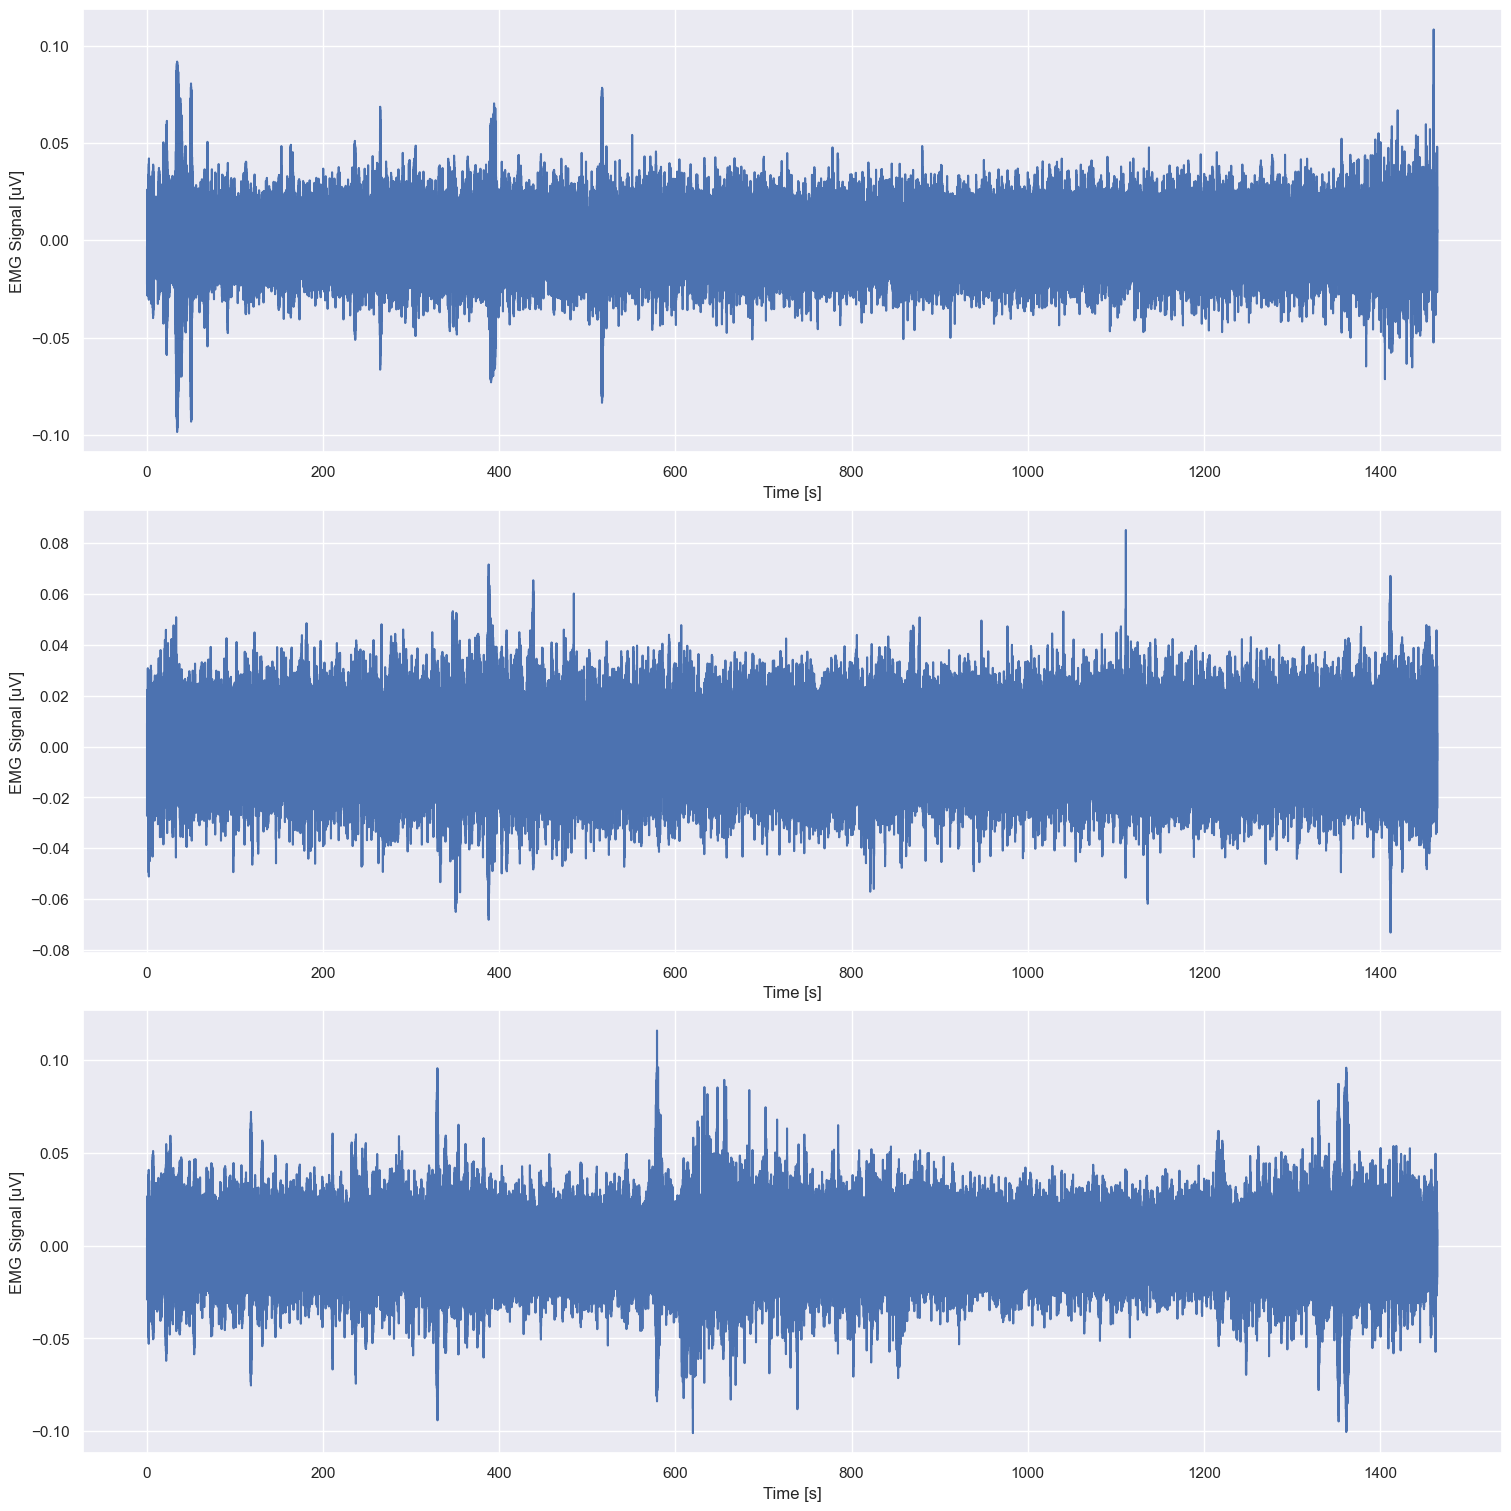

In [19]:
Wn = (5, 500) 
sos_3 = butter(N=4, Wn=Wn, fs=fs_3, btype="bandpass", output="sos") 
emg_filtered_3 = sosfiltfilt(sos_3, emg_3.T).T 

Wns = [n*50 for n in range(1,11)] # removing 50Hz noise and its harmonics

for Wn in Wns:
    sos_3 = butter(N=4, Wn=(Wn - 0.5, Wn + 0.5), fs=fs_3, btype="bandstop", output="sos")
    emg_filtered_3 = sosfiltfilt(sos_3, emg_filtered_3.T).T

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_filtered_3[:,i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")

Text(0.5, 1.0, 'Log scale for y-axis')

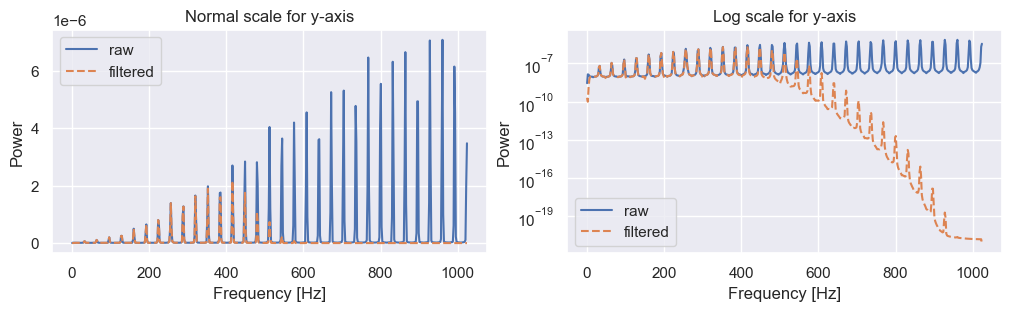

In [20]:
# Use Welch's method for power spectral density estimation, it reduces the variance of the estimate.
freqs_pre_3, Pxx_pre_3 = welch(emg_3[:, 0], fs=fs_3, nperseg=1064)
freqs_post_3, Pxx_post_3 = welch(emg_filtered_3[:, 0],fs = fs_3,  nperseg=1064)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3))
ax[0].plot(freqs_pre_3, Pxx_pre_3, label="raw")
ax[0].plot(freqs_post_3, Pxx_post_3, linestyle="--", label="filtered")
ax[0].legend()
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_ylabel("Power")
ax[0].set_title("Normal scale for y-axis")

ax[1].semilogy(freqs_pre_3, Pxx_pre_3, label="raw")
ax[1].semilogy(freqs_post_3, Pxx_post_3, linestyle="--", label="filtered")
ax[1].legend()
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Power")
ax[1].set_title("Log scale for y-axis")

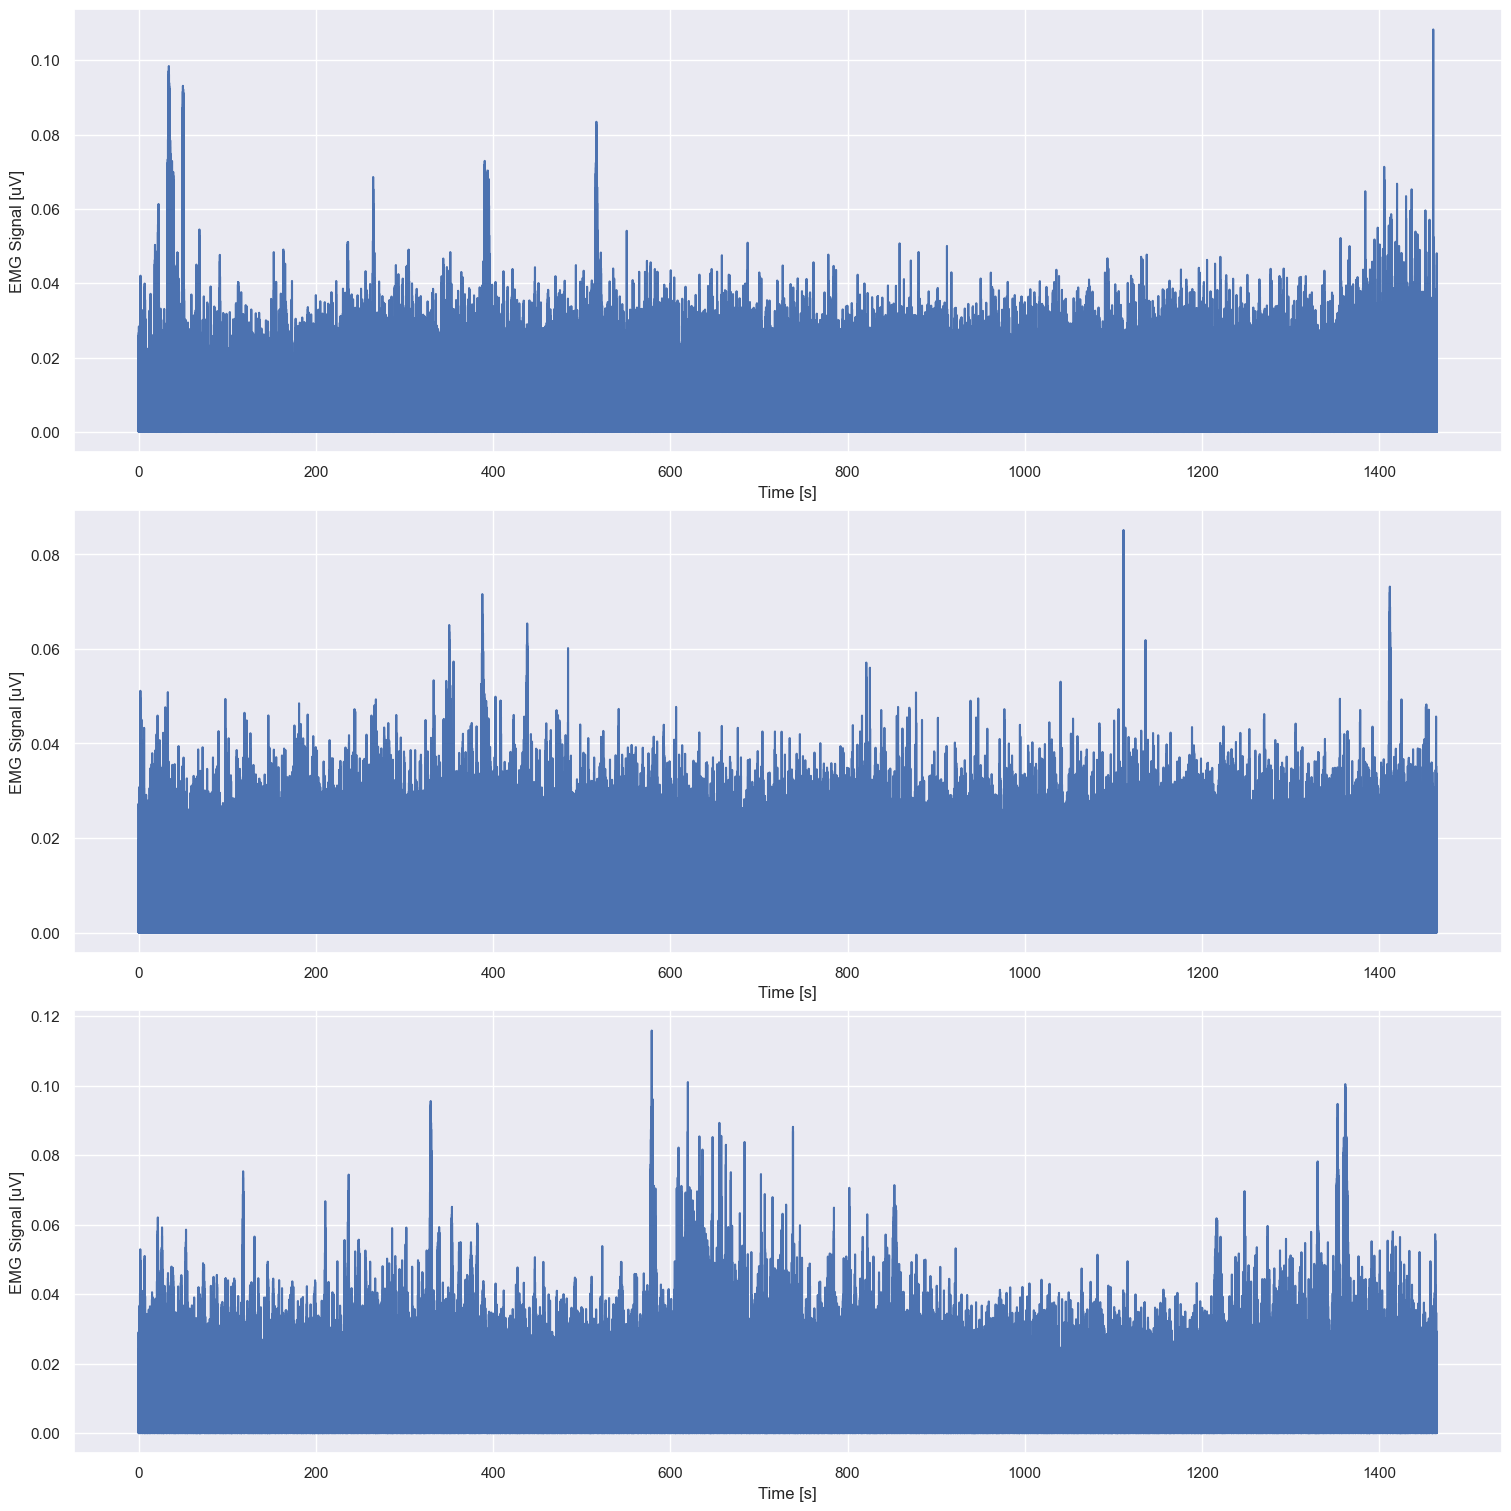

In [21]:
emg_rectified_3 = np.abs(emg_filtered_3) # Rectify the signal

fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_rectified_3[:, i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")

Text(0.5, 0.98, 'EMG envelopes')

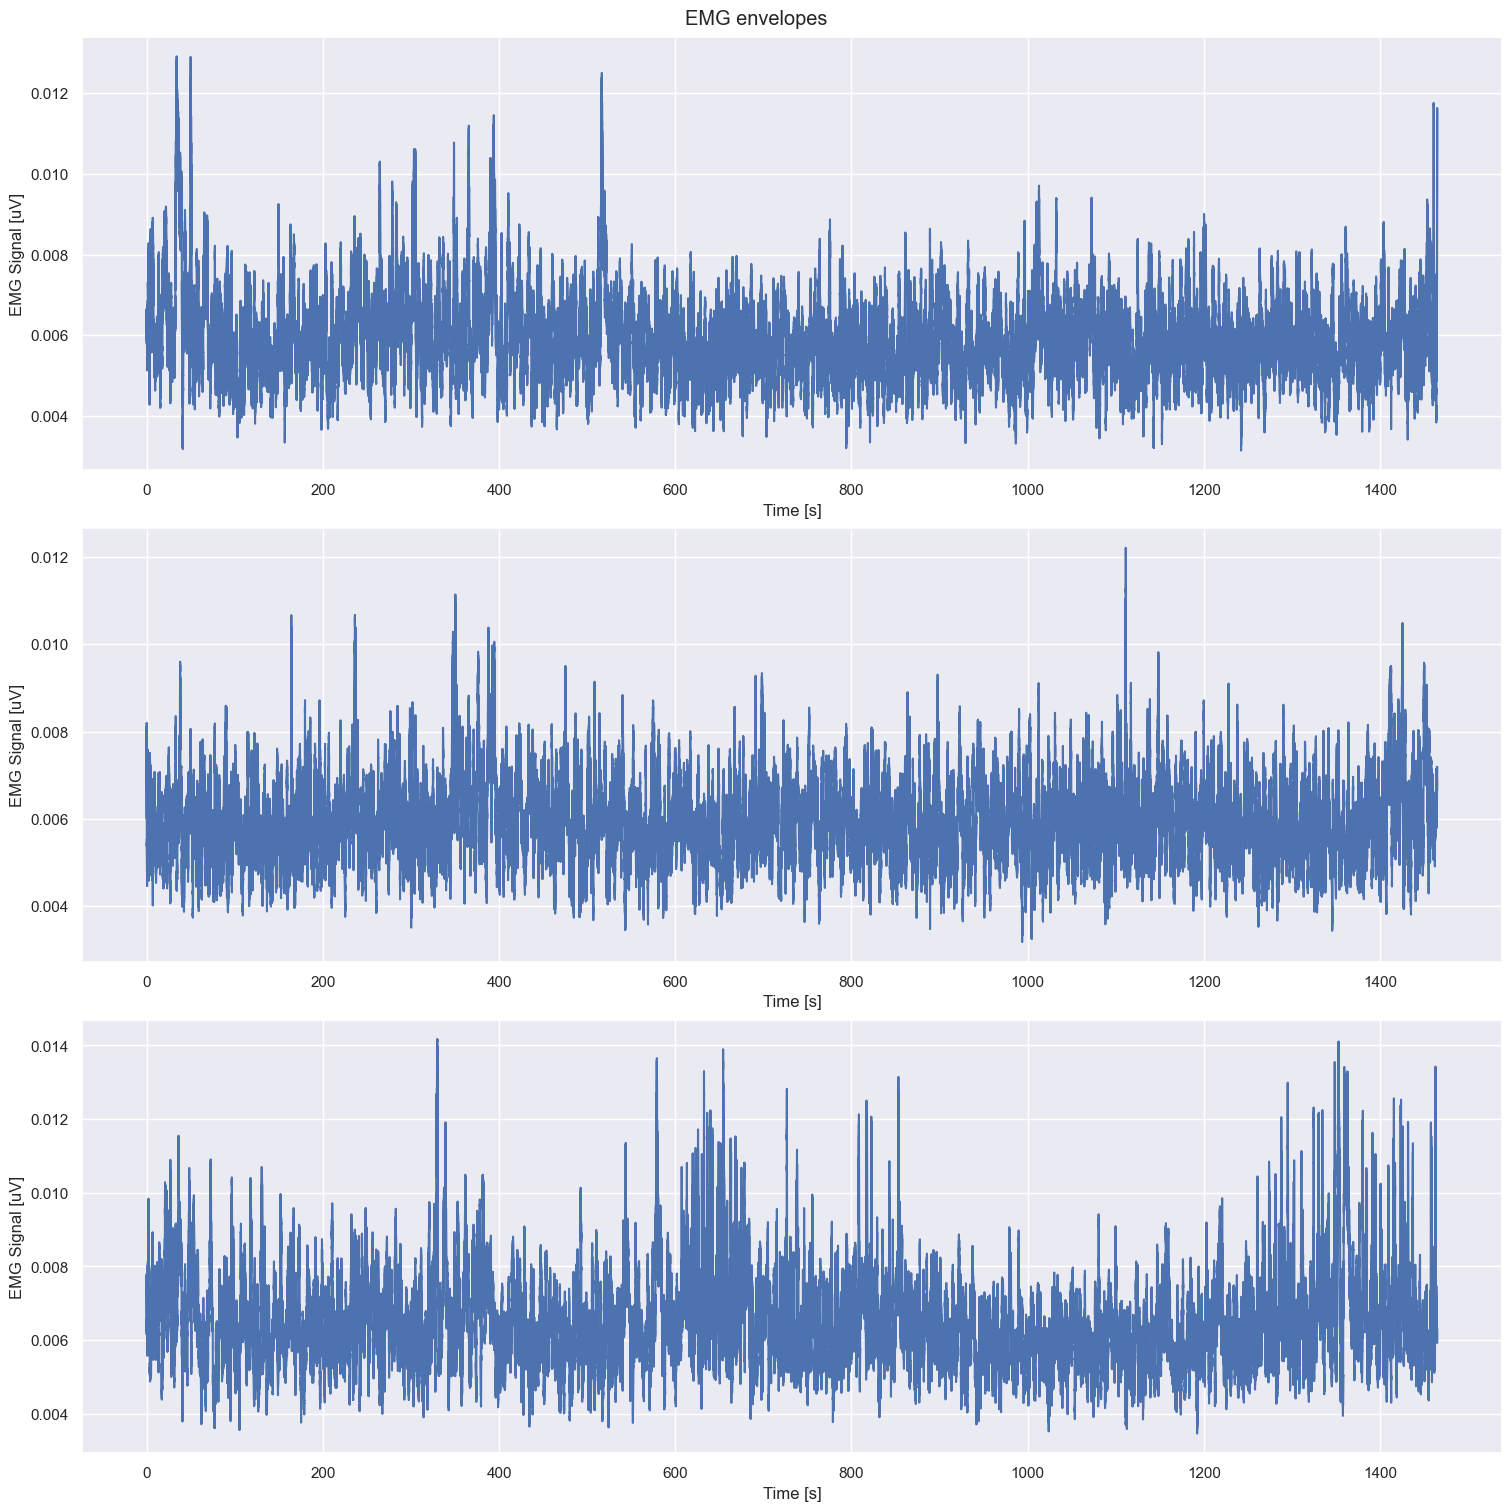

In [22]:
mov_mean_size = 400
mov_mean_weights = np.ones(mov_mean_size) / mov_mean_size
emg_envelopes_3 = convolve1d(emg_rectified_3, weights = mov_mean_weights, axis=0) # convolve1d the rectified signal with the moving average weights


fig, ax = plt.subplots(n_channels, 1, constrained_layout=True, figsize=(15, 15))
for i in range(n_channels):
    ax[i].plot(tsteps, emg_envelopes_3[:, i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("EMG Signal [uV]")
plt.suptitle("EMG envelopes")

In [23]:
compression = 2
emg_envelopes_3 = emg_envelopes_3[::2, :]
emg_envelopes_3.shape

(1500000, 64)

## ICA : (with Fast ICA)
### Subject 1 

In [24]:
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=5)

W_1 = ICA.fit_transform(emg_envelopes_1)
H_1 = ICA.components_

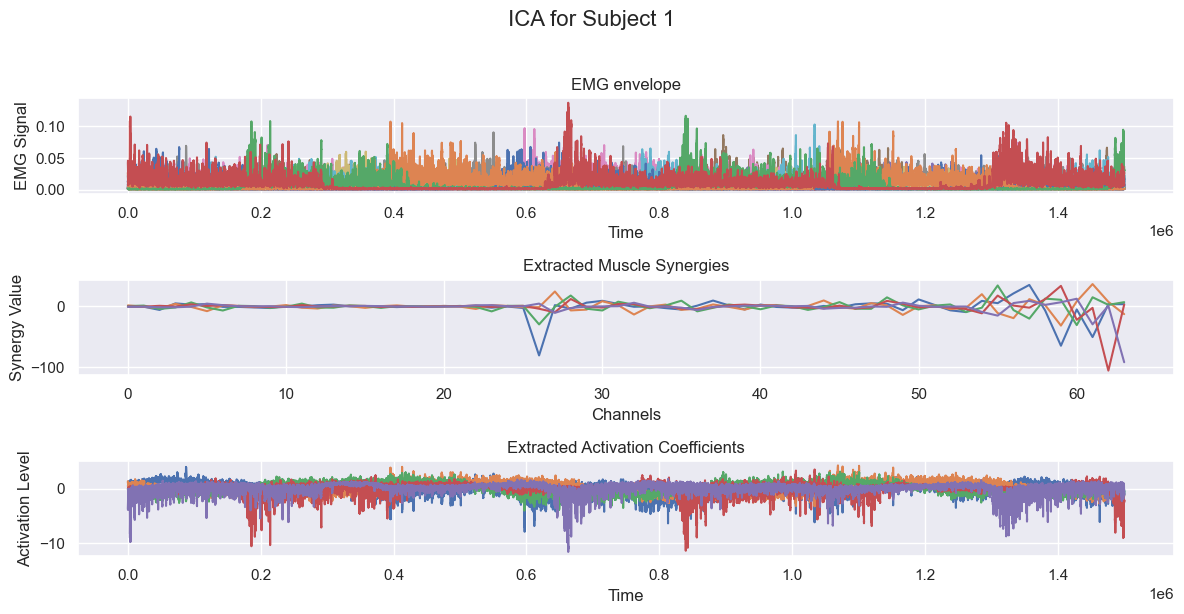

In [25]:
# Plot synthetic EMG data
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(emg_envelopes_1)
plt.title('EMG envelope')
plt.xlabel('Time')
plt.ylabel('EMG Signal')

# Plot extracted synergies
plt.subplot(3, 1, 2)
plt.plot(H_1.T)
plt.title('Extracted Muscle Synergies')
plt.xlabel('Channels')
plt.ylabel('Synergy Value')

# Plot extracted activation coefficients
plt.subplot(3, 1, 3)
plt.plot(W_1)
plt.title('Extracted Activation Coefficients')
plt.xlabel('Time')
plt.ylabel('Activation Level')

plt.suptitle('ICA for Subject 1', fontsize=16, y=1.02)

plt.tight_layout()

### Subject 2

In [26]:
from sklearn.decomposition import FastICA

ICA = FastICA(n_components=5)
W_2 = ICA.fit_transform(emg_envelopes_2)
H_2 = ICA.components_

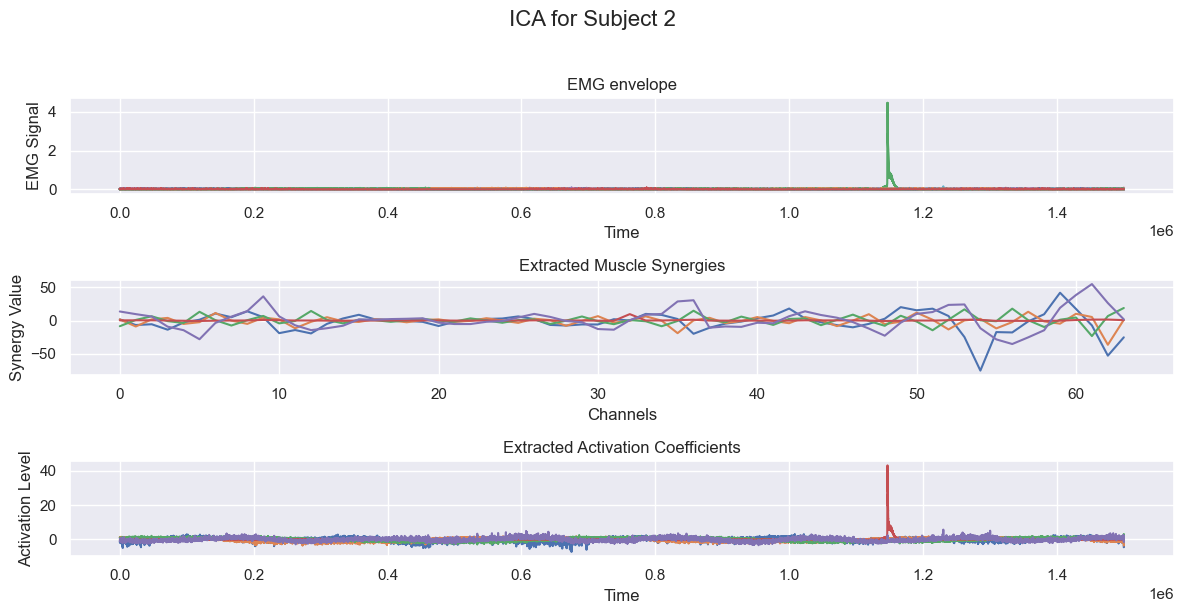

In [27]:
# Plot synthetic EMG data
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(emg_envelopes_2)
plt.title('EMG envelope')
plt.xlabel('Time')
plt.ylabel('EMG Signal')

# Plot extracted synergies
plt.subplot(3, 1, 2)
plt.plot(H_2.T)
plt.title('Extracted Muscle Synergies')
plt.xlabel('Channels')
plt.ylabel('Synergy Value')

# Plot extracted activation coefficients
plt.subplot(3, 1, 3)
plt.plot(W_2)
plt.title('Extracted Activation Coefficients')
plt.xlabel('Time')
plt.ylabel('Activation Level')

plt.suptitle('ICA for Subject 2', fontsize=16, y=1.02)

plt.tight_layout()

### Subject 3

In [28]:
from sklearn.decomposition import FastICA

ICA = FastICA(n_components=5)
W_3 = ICA.fit_transform(emg_envelopes_3)
H_3 = ICA.components_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


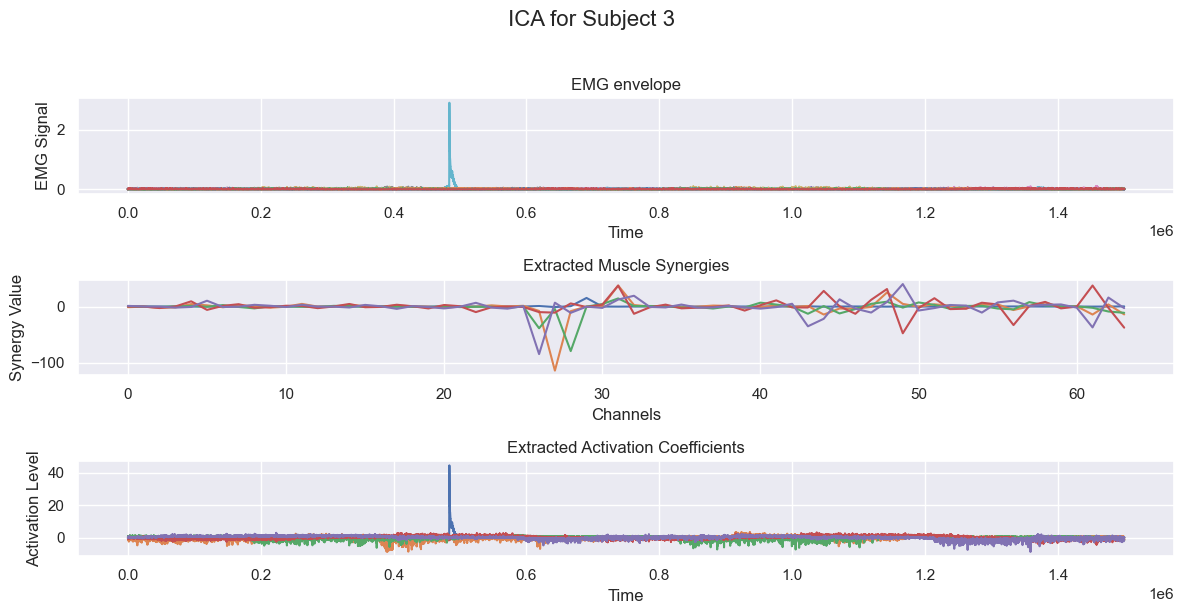

In [29]:
# Plot synthetic EMG data
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(emg_envelopes_3)
plt.title('EMG envelope')
plt.xlabel('Time')
plt.ylabel('EMG Signal')

# Plot extracted synergies
plt.subplot(3, 1, 2)
plt.plot(H_3.T)
plt.title('Extracted Muscle Synergies')
plt.xlabel('Channels')
plt.ylabel('Synergy Value')

# Plot extracted activation coefficients
plt.subplot(3, 1, 3)
plt.plot(W_3)
plt.title('Extracted Activation Coefficients')
plt.xlabel('Time')
plt.ylabel('Activation Level')

plt.suptitle('ICA for Subject 3', fontsize=16, y=1.02)

plt.tight_layout()

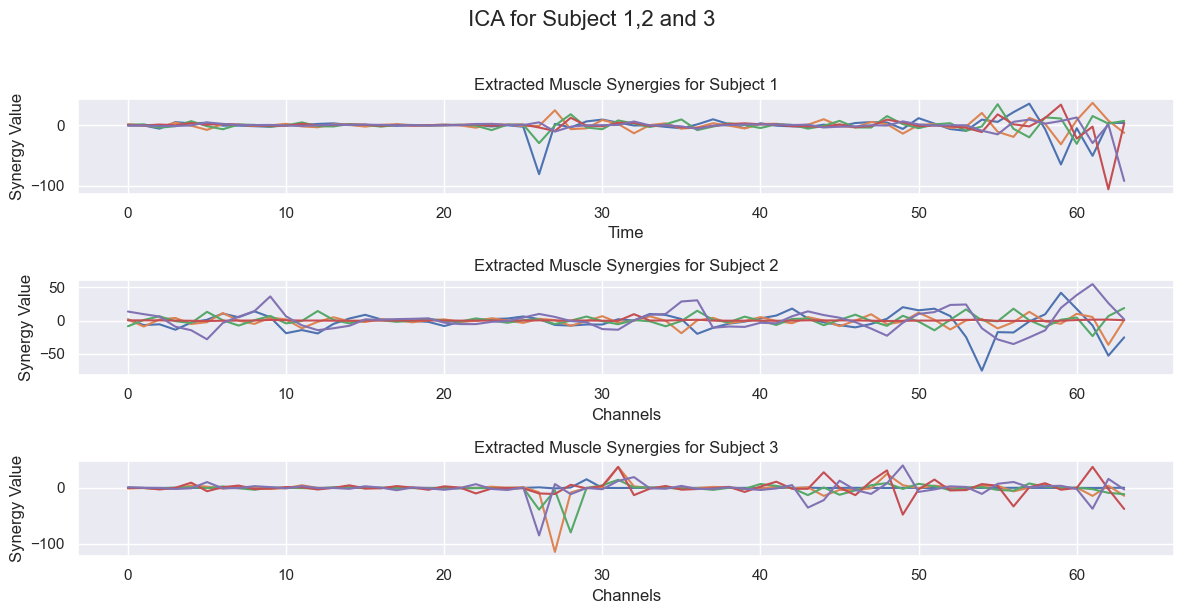

In [30]:
# Plot synthetic EMG data
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(H_1.T)
plt.title('Extracted Muscle Synergies for Subject 1')
plt.xlabel('Time')
plt.ylabel('Synergy Value')

# Plot extracted synergies
plt.subplot(3, 1, 2)
plt.plot(H_2.T)
plt.title('Extracted Muscle Synergies for Subject 2')
plt.xlabel('Channels')
plt.ylabel('Synergy Value')

# Plot extracted activation coefficients
plt.subplot(3, 1, 3)
plt.plot(H_3.T)
plt.title('Extracted Muscle Synergies for Subject 3')
plt.xlabel('Channels')
plt.ylabel('Synergy Value')

plt.suptitle('ICA for Subject 1,2 and 3', fontsize=16, y=1.02)
plt.tight_layout()